# Diwali_Sales_Analysis

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
df=pd.read_csv('Diwali sales Data.csv', encoding='unicode_escape')

In [6]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [8]:
df.shape

(11251, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [12]:
#dropped unrelated/blank columns

df.drop(['Status','unnamed1'],axis=1,inplace= True)

In [14]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [16]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
#checking null values

pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [20]:
#priniting null rows

null_rows=df[df.isnull().any(axis=1)]
print(null_rows)


     User_ID Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
7    1002092  Shivangi  P00273442      F       55+   61               0   
14   1003858      Cano  P00293742      M     46-50   46               1   
16   1005447       Amy  P00275642      F     46-50   48               1   
109  1005265    Sakshi  P00296242      F     46-50   48               1   
111  1005261   Apoorva  P00057942      F     36-45   41               1   
184  1005538    Kartik  P00269542      F     46-50   49               1   
293  1000326  Jonathan  P00120542      M     51-55   53               0   
344  1002507   Lakshmi  P00045842      F     26-35   35               1   
345  1004498   Srishti  P00030842      F     51-55   55               0   
452  1004601    Gaurav  P00014442      F     36-45   40               1   
464  1004528    Anurag  P00338442      F     26-35   33               1   
493  1002994    Hemant   P0009942      F     36-45   38               0   

              State     

In [22]:
# drop null values

df.dropna(inplace=True)

In [24]:
df.shape

(11239, 13)

In [26]:
#change data type

df['Amount']=df['Amount'].astype('int')

In [28]:
df['Amount'].dtypes

dtype('int64')

In [30]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [32]:
# use describe for specific columns

df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

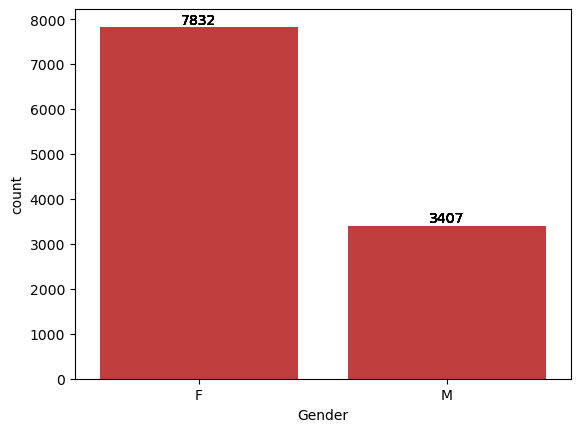

In [69]:
ax=sns.countplot(x ='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

In [75]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


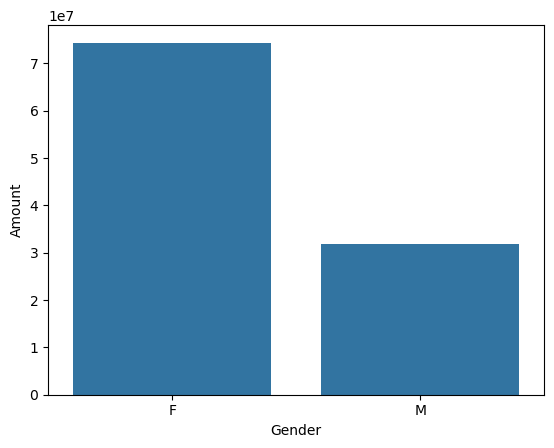

In [85]:
#Total amount vs Gender

sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender',y='Amount',data=sales_gen)
plt.show()

*From above graphs we can see than most of the buyers are females and even the purchasing power of females are greater than males*

## Age Group

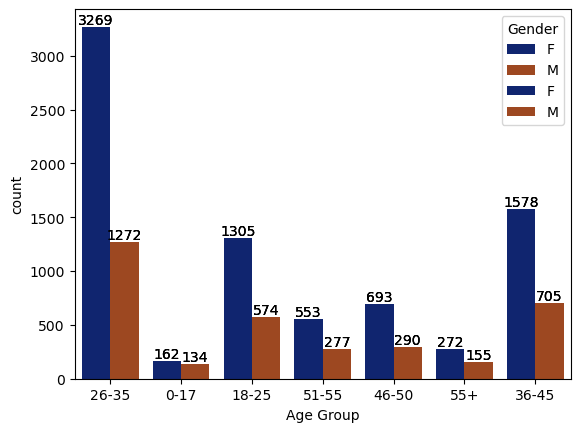

In [102]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender',palette='dark')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

/var/folders/vc/4b9h10p51h99m8_w7_zyttk80000gn/T/ipykernel_2798/428327458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group',y='Amount',data=sales_age,palette='pastel')


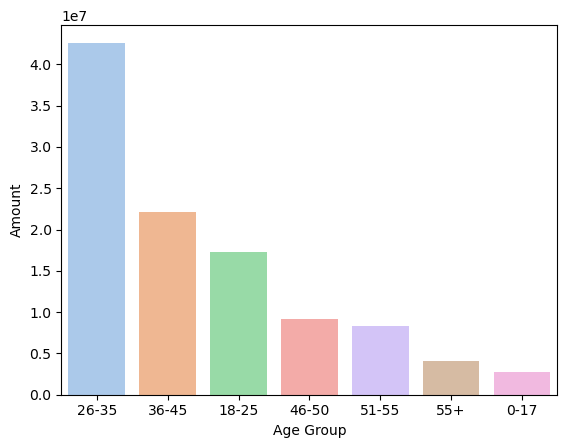

In [114]:
#Total Amount vs Age Group

sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group',y='Amount',data=sales_age,palette='pastel')
plt.show()

*From above graphs we can see that most of the buyers are between the age group 26-35 females*

## State

/var/folders/vc/4b9h10p51h99m8_w7_zyttk80000gn/T/ipykernel_2798/689200617.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state,x='State',y='Orders',palette='dark')


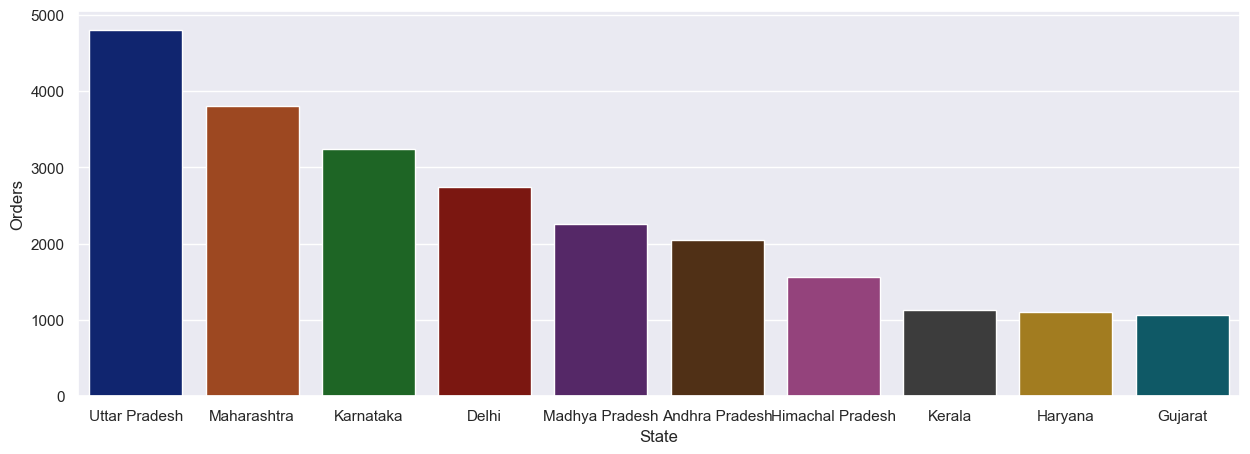

In [134]:
#total number of orders from top 10 states

sales_state=df.groupby('State',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='State',y='Orders',palette='dark')

plt.show()


/var/folders/vc/4b9h10p51h99m8_w7_zyttk80000gn/T/ipykernel_2798/1895541457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_states,x='State',y='Amount',palette=['pink','orange','red','green'])
/var/folders/vc/4b9h10p51h99m8_w7_zyttk80000gn/T/ipykernel_2798/1895541457.py:6: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=sales_states,x='State',y='Amount',palette=['pink','orange','red','green'])


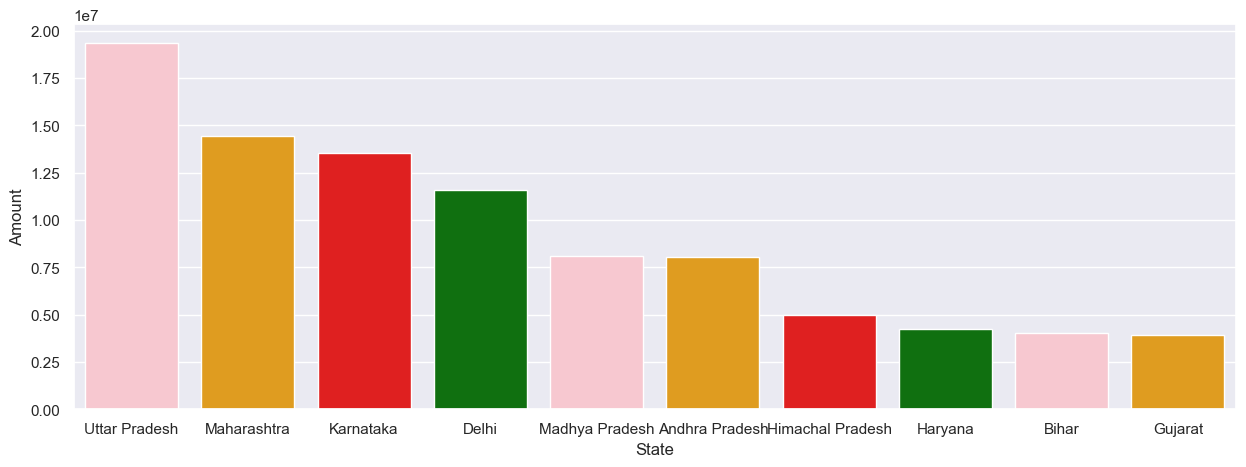

In [152]:
#total amount/sales from top 10 states

sales_states=df.groupby('State',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_states,x='State',y='Amount',palette=['pink','orange','red','green'])
plt.show()

*From above graph we saw that unexpectedly most of the orders are from UP,Maharashtra and Karnataka respectively but total sales/amount is from UP, Karnataka and then Maharashtra*

## Marital Status

/var/folders/vc/4b9h10p51h99m8_w7_zyttk80000gn/T/ipykernel_2798/1490001679.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='Marital_Status', palette=['grey'])
/var/folders/vc/4b9h10p51h99m8_w7_zyttk80000gn/T/ipykernel_2798/1490001679.py:1: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  ax=sns.countplot(data=df, x='Marital_Status', palette=['grey'])


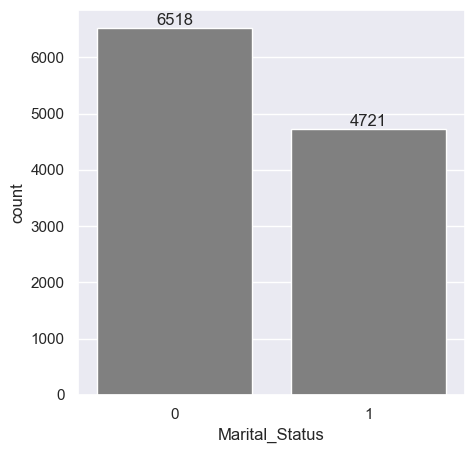

In [173]:
ax=sns.countplot(data=df, x='Marital_Status', palette=['grey'])

sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

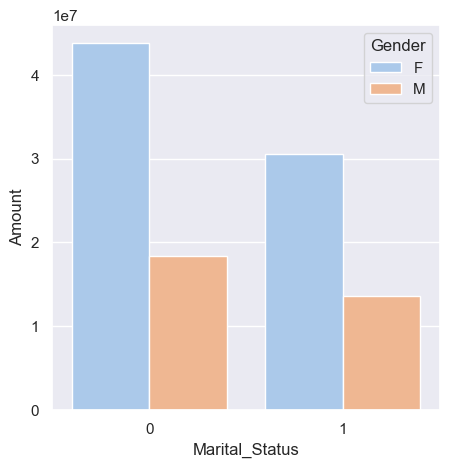

In [177]:
sales_status=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(5,5)})

sns.barplot(data=sales_status,x='Marital_Status',y='Amount',hue='Gender',palette='pastel')

plt.show()

*From above graph we can see that most of the buyers are married (females) and they have high purchasing power*

## Occupation

/var/folders/vc/4b9h10p51h99m8_w7_zyttk80000gn/T/ipykernel_2798/4274068607.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x='Occupation',palette='colorblind')


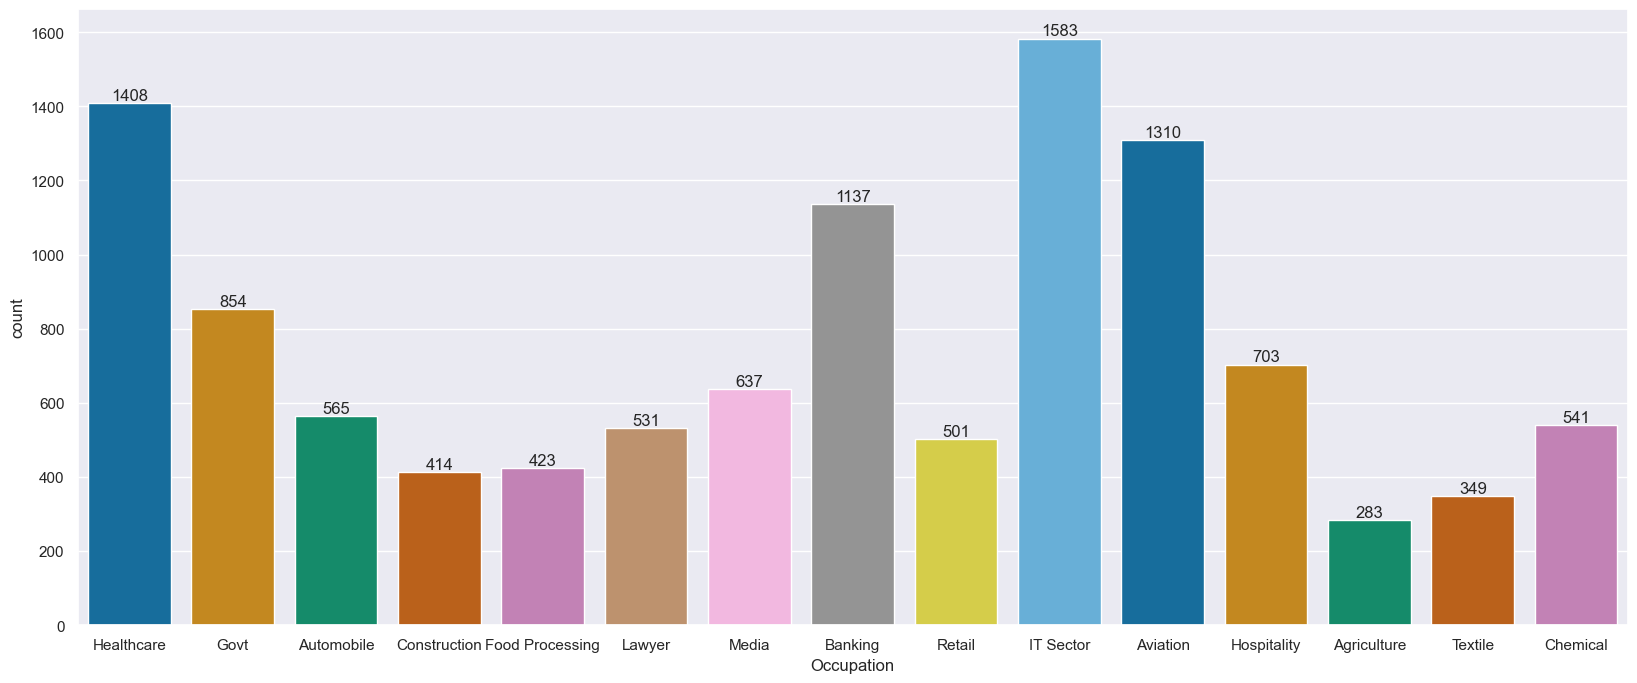

In [212]:
ax=sns.countplot(data=df,x='Occupation',palette='colorblind')

sns.set(rc={'figure.figsize':(20,8)})
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

/var/folders/vc/4b9h10p51h99m8_w7_zyttk80000gn/T/ipykernel_2798/1964489079.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_occupation,x='Occupation',y='Amount',palette=['orange','brown','pink'])
/var/folders/vc/4b9h10p51h99m8_w7_zyttk80000gn/T/ipykernel_2798/1964489079.py:3: UserWarning: 
The palette list has fewer values (3) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=sales_occupation,x='Occupation',y='Amount',palette=['orange','brown','pink'])


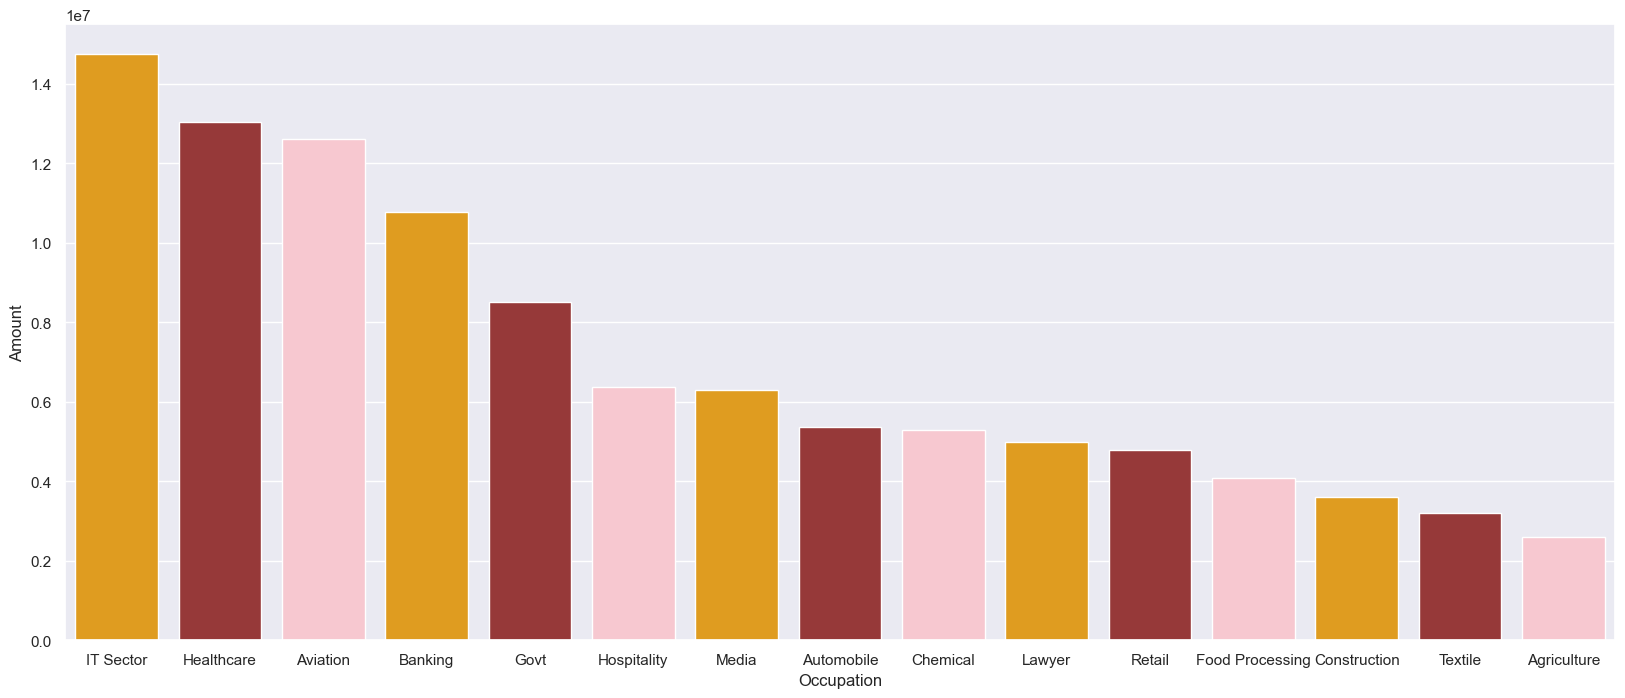

In [208]:
sales_occupation=df.groupby('Occupation',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(data=sales_occupation,x='Occupation',y='Amount',palette=['orange','brown','pink','blue',''])
plt.show()

*From above graphs it can be seen that most buyers are from IT Sector, Healthcare and Aviation*

## Product Category

/var/folders/vc/4b9h10p51h99m8_w7_zyttk80000gn/T/ipykernel_2798/1963946623.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x='Product_Category',palette='colorblind')


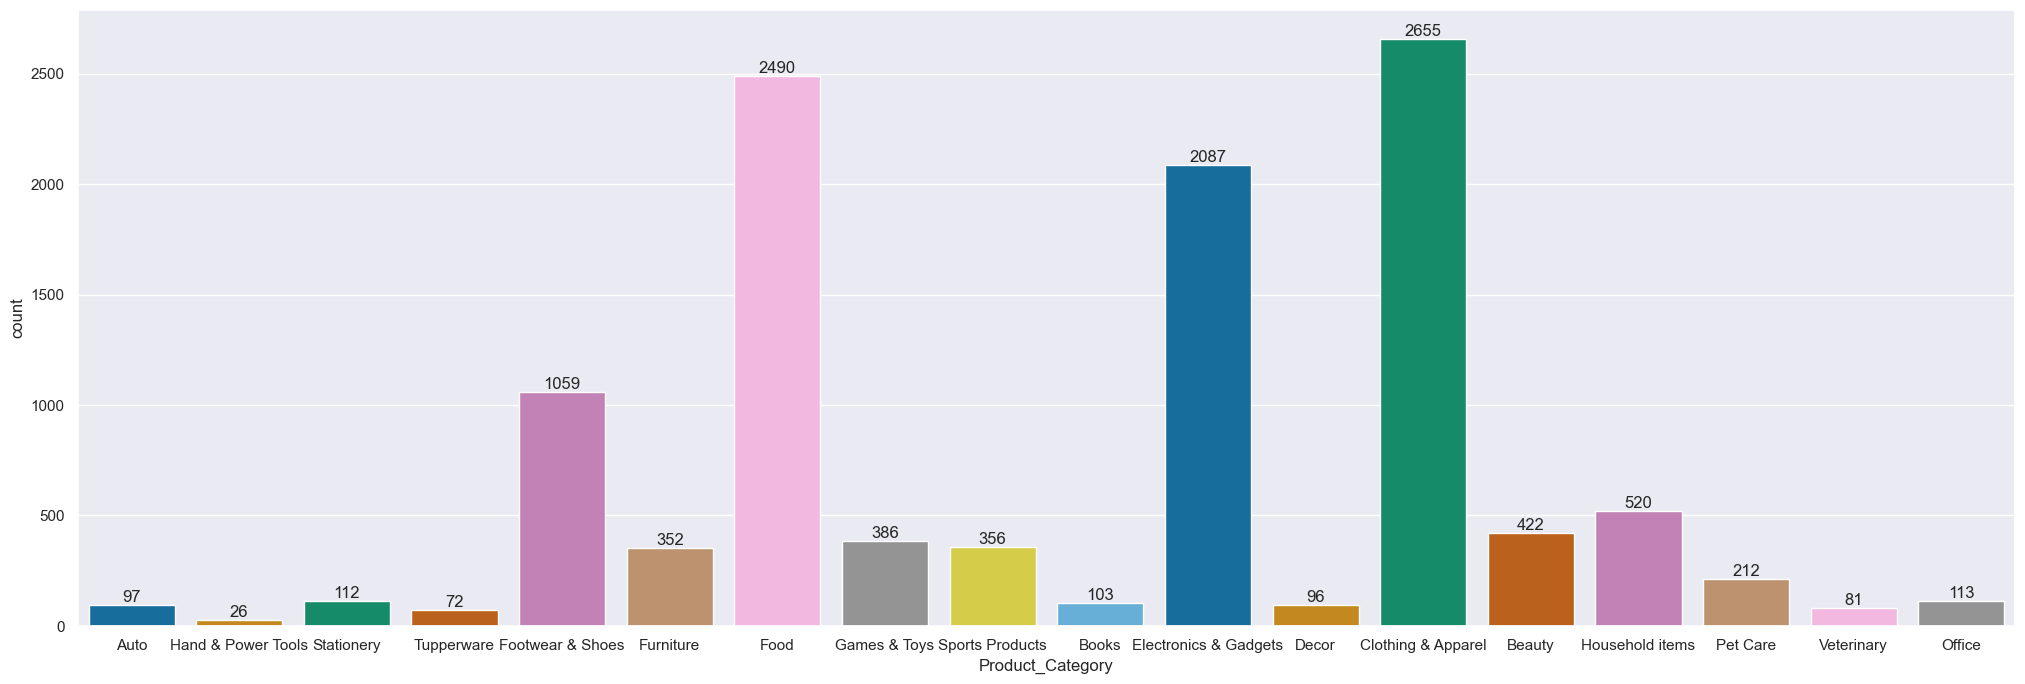

In [219]:
ax=sns.countplot(data=df,x='Product_Category',palette='colorblind')

sns.set(rc={'figure.figsize':(25,8)})
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


/var/folders/vc/4b9h10p51h99m8_w7_zyttk80000gn/T/ipykernel_2798/1900051802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_category,x='Product_Category',y='Amount',palette=['orange','brown','pink','blue'])
/var/folders/vc/4b9h10p51h99m8_w7_zyttk80000gn/T/ipykernel_2798/1900051802.py:3: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=sales_category,x='Product_Category',y='Amount',palette=['orange','brown','pink','blue'])


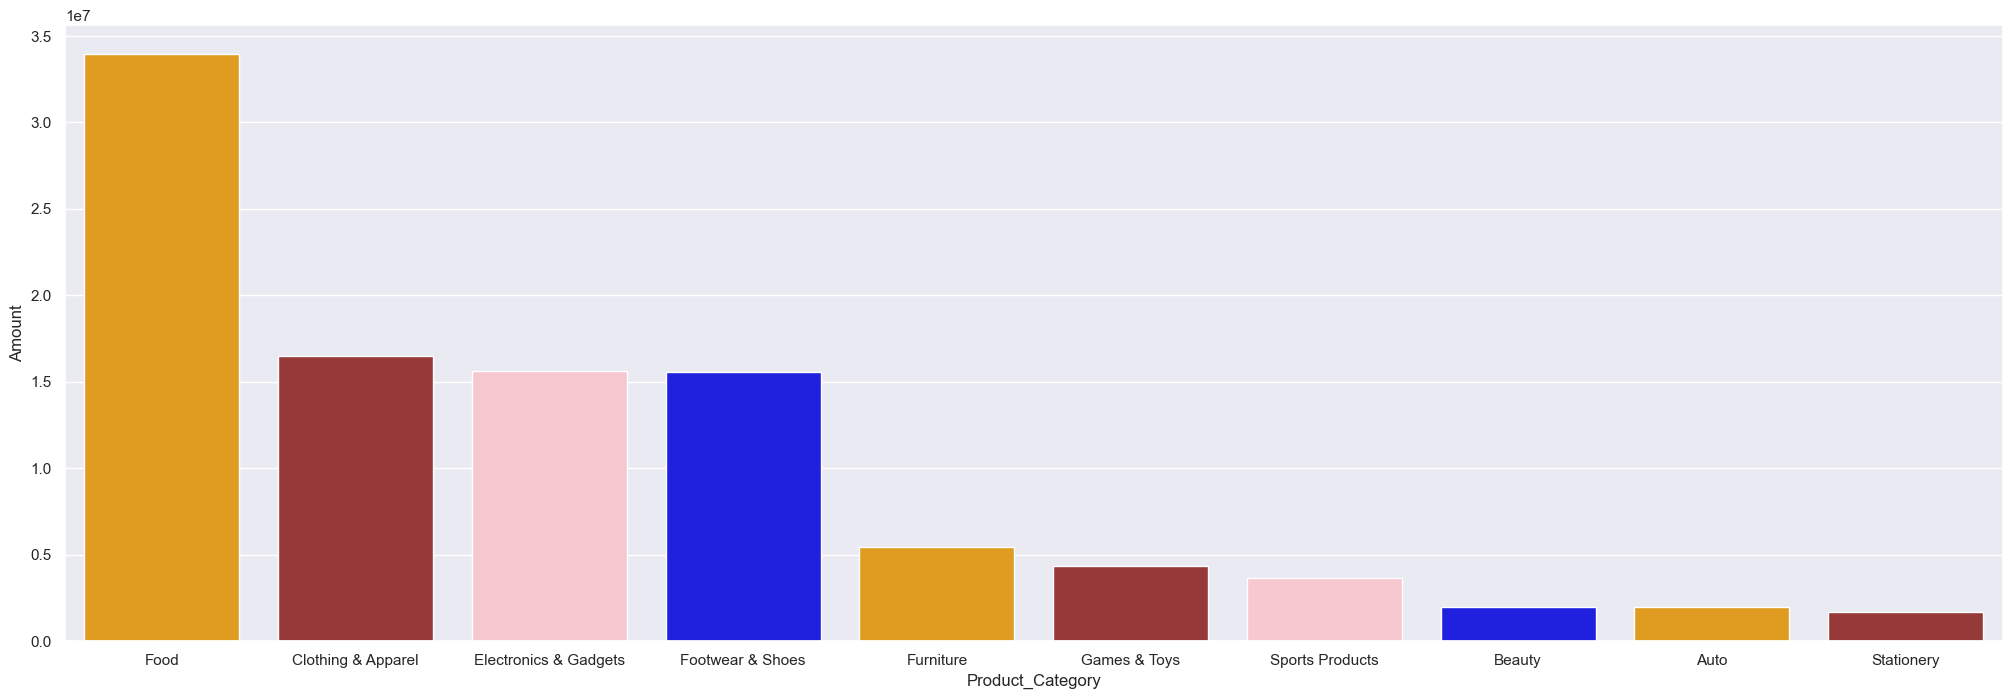

In [234]:
sales_category=df.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.barplot(data=sales_category,x='Product_Category',y='Amount',palette=['orange','brown','pink','blue'])
plt.show()

*From above graphs we can see that most of the products order were from category Clothing but most sales from Food Category*

/var/folders/vc/4b9h10p51h99m8_w7_zyttk80000gn/T/ipykernel_2798/1452380902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_product,x='Product_ID',y='Orders',palette='pastel')


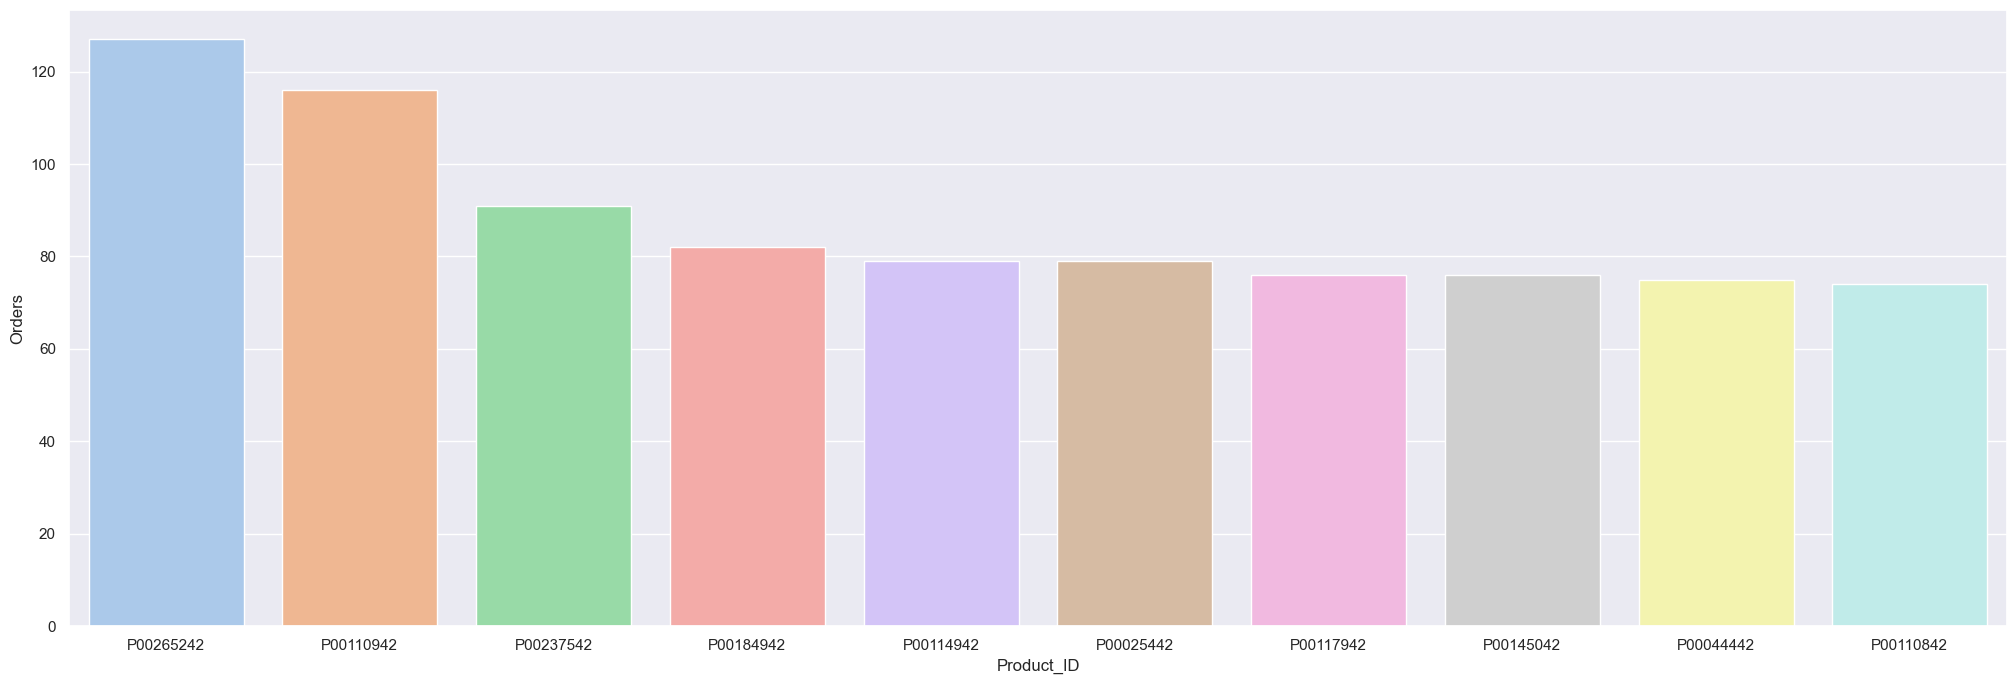

In [236]:
sales_product=df.groupby('Product_ID',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.barplot(data=sales_product,x='Product_ID',y='Orders',palette='pastel')
plt.show()

# Conclusion

## Married women between age group 26-35 yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are most likely to buy products from Food, Clothing and Electronics Category 